# Fixing part id after Sync
After Sync at the moment the part ids are being assigned wrongly into the model.json, because the creationg of part ids is just taking the amount of parts in the queues and assigning the id in increasing order, but after sync we have some parts in the middle of machine, something that's not clear how to extract correctly... 

In [11]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin
import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class

<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

#### The strategy

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
|-- Parts stored: Part 2
Queue Lenght: 1
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In:--
Queue 3
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine

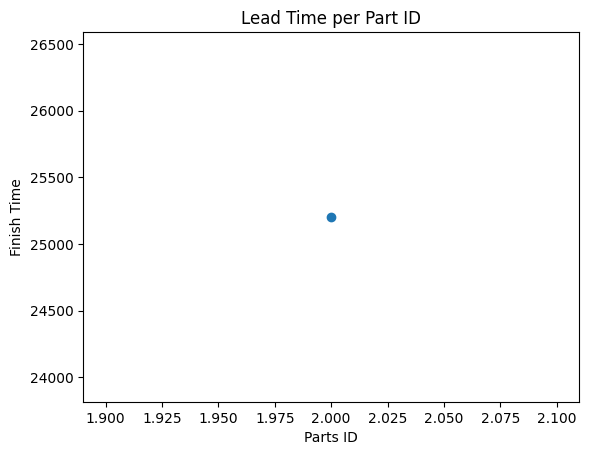

- Maximum Cycle Time: 25202
- Minimum Cycle Time: 25202
>>> Average system cycle time: 25202.0 [time unit]***


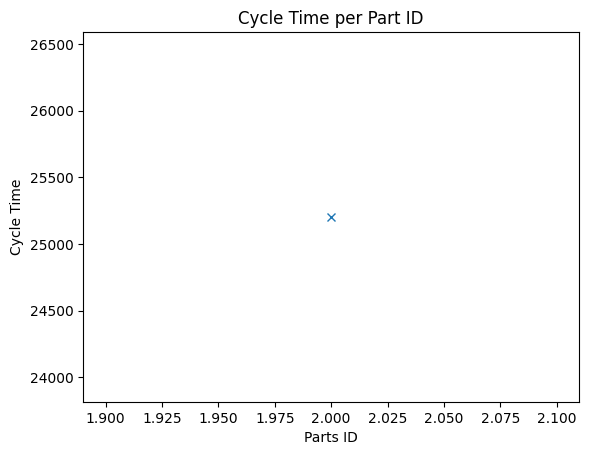

>>> System Throughput: 3.9679390524561545e-05 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [65]:
mydt = Digital_Twin(name= "5s_determ", targeted_part_id= 2)
mydt.run_digital_model()

In [66]:
mydt.run_sync()

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 1
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
|-- Parts stored: Part 2
Queue Lenght: 1
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine 3
--Queue In:--
Queue 3
--Queue Out:--
Queue 4
Machine Cluster: 2
----------------
> Machine

In [49]:
s = "Part 124"  # or "Part 4" or any other string containing a number
num_str = ''.join(filter(str.isdigit, s))  # extract all digits from the string
num = int(num_str)  # convert the string of digits to an integer
print(num + 2)  # output the integer

126


### Testing the model translation with the new assignment

In [2]:
mydt = Digital_Twin(name= "5s_determ", targeted_part_id= 1)
mydt.generate_digital_model()

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 3
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 1 ---
----------------
> Machine 3
--Queue In:--
Queue 3
--Queue Out:--
Queue 4
Machine Cluster: 2
------

==========  Reading the Model: 5s_determ  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 3
|-- Parts stored: Part 3
Queue Lenght: 1
----------------
Queue 2
Arc links: [1, 2]
Capacity: 1
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 1
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 2
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 1
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
Branching Machine: Branch 1 | Machine 1
|-- Conveyor towards Queue 2
|-- Conveyor towards Queue 3
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
--- Part already being processed: Part 1 ---
----------------
> Machine 3
--Queue In:--
Queue 3
--Queue Out:--
Queue 4
Machine Cluster: 2
------

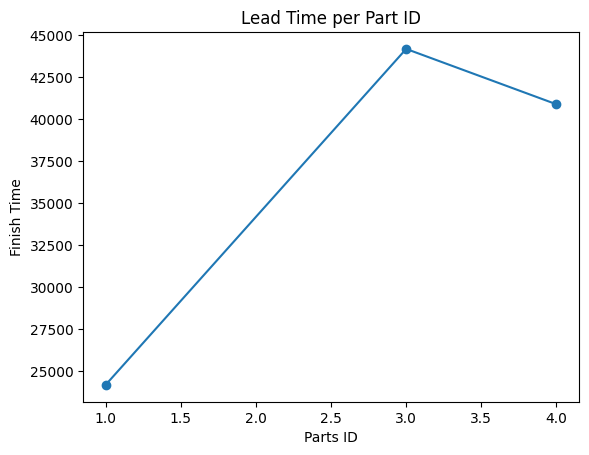

- Maximum Cycle Time: 44201
- Minimum Cycle Time: 16704
>>> Average system cycle time: 28368.666666666668 [time unit]***


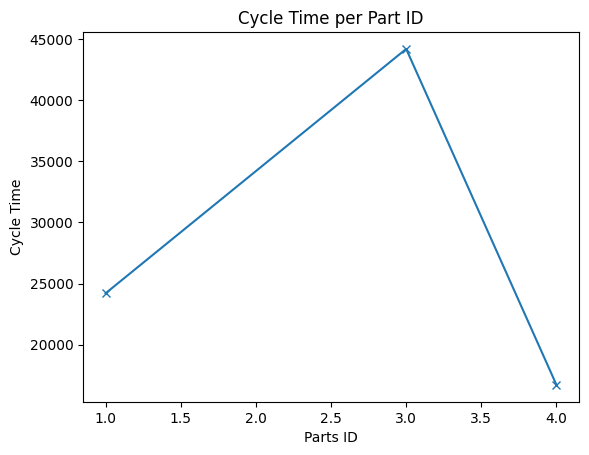

>>> System Throughput: 6.787176760706771e-05 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [12]:
mydt = Digital_Twin(name= "5s_determ", targeted_part_id= 3)
mydt.run_digital_model()